In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [4]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

Testing the agent population construction.

In [5]:
pop = hpa.AgentPopulation(agent_parameters, dist_params, 20)

In [6]:
isct = IndShockConsumerType(**pop.agents[0].parameters)

In [7]:
isct.solve()

In [8]:
isct.solution[0].mNrmStE

1.4295374863078805

In [9]:
isct

<HARK.ConsumptionSaving.ConsIndShockModel.IndShockConsumerType object at 0x7f4128b14bb0.
Parameters:
cycles: 1
CRRA: 4.0
Rfree: 1.0
DiscFac: 0.9465000000000001
LivPrb: [0.9949620563926881]
PermGroFac: [1.0024906793143211]
BoroCnstArt: 0.0
MaxKinks: 400
AgentCount: 4
aNrmInitMean: 0.0
aNrmInitStd: 0.0
pLvlInitMean: 1.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
aXtraMin: 0.001
aXtraMax: 100
aXtraNestFac: 1
aXtraCount: 200
aXtraExtra: [None]
PermShkStd: [0.6191893521335142]
PermShkCount: 7
TranShkStd: [0.16588349452107798]
TranShkCount: 7
UnempPrb: 0.05
UnempPrbRet: 0.005
IncUnemp: 0.3
IncUnempRet: 0.0
tax_rate: 0.0
T_retire: 0
vFuncBool: False
CubicBool: False
neutral_measure: False
RiskyAvg: 1.08
RiskyStd: 0.2
RiskyCount: 5
AdjustPrb: 1.0
ShareCount: 25
DiscreteShareBool: False>

In [10]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [11]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 20, a=0.2, q=8, r=10, market= market)

Q-0
Testing for blob existence: pnl/LMtransactions_SD12BL0SL0.csv
Output for S:12,BL:0,SL:0 already exists in Azure Blob storage.
Will use cache.


/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Testing for blob existence: pnl/LMtransactions_SD61BL26SL6.csv
Output for S:61,BL:26,SL:6 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD55BL10SL20.csv
Output for S:55,BL:10,SL:20 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 144
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD144BL57SL15.csv


NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=144
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=57
SETTING: BkrSel_Limit:=15
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD144BL57SL15.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==144.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==57.0
REPORTING: BkrSel_Limit==15.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING:

Elapsed (sys clock), run 144:  48.87771304700001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD144BL57SL15.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD62BL27SL14.csv
Output for S:62,BL:27,SL:14 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 120
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD120BL4SL5.csv


NL model loaded
SETTING: SEED:=120
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=4
SETTING: BkrSel_Limit:=5
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD120BL4SL5.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==120.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==4.0
REPORTING: BkrSel_Limit==5.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 120:  33.03493875000001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD120BL4SL5.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD67BL3SL20.csv
Output for S:67,BL:3,SL:20 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 92
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD92BL9SL11.csv


NL model loaded
SETTING: SEED:=92
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=9
SETTING: BkrSel_Limit:=11
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL9SL11.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==92.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==9.0
REPORTING: BkrSel_Limit==11.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 92:  31.828922518000013

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL9SL11.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 87
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD87BL77SL9.csv


NL model loaded
SETTING: SEED:=87
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=77
SETTING: BkrSel_Limit:=9
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD87BL77SL9.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==87.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==77.0
REPORTING: BkrSel_Limit==9.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 87:  31.190444098

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD87BL77SL9.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD48BL24SL14.csv
Output for S:48,BL:24,SL:14 already exists in Azure Blob storage.
Will use cache.
Q-1
Testing for blob existence: pnl/LMtransactions_SD15BL69SL16.csv
Output for S:15,BL:69,SL:16 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 146
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD146BL14SL15.csv


NL model loaded
SETTING: SEED:=146
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=14
SETTING: BkrSel_Limit:=15
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD146BL14SL15.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==146.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==14.0
REPORTING: BkrSel_Limit==15.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 146:  30.15566510299999

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD146BL14SL15.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD11BL53SL84.csv
Output for S:11,BL:53,SL:84 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 104
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD104BL0SL32.csv


NL model loaded
SETTING: SEED:=104
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=32
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD104BL0SL32.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==104.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==32.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 104:  31.11107513899998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD104BL0SL32.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 143
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD143BL1SL52.csv


NL model loaded
SETTING: SEED:=143
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=52
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD143BL1SL52.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==143.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==52.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 143:  30.42023107800003

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD143BL1SL52.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 78
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD78BL3SL97.csv


NL model loaded
SETTING: SEED:=78
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=3
SETTING: BkrSel_Limit:=97
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL3SL97.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==78.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==3.0
REPORTING: BkrSel_Limit==97.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 78:  30.439131550000013

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL3SL97.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD44BL32SL61.csv
Output for S:44,BL:32,SL:61 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD71BL7SL16.csv
Output for S:71,BL:7,SL:16 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 136
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD136BL8SL40.csv


NL model loaded
SETTING: SEED:=136
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=8
SETTING: BkrSel_Limit:=40
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD136BL8SL40.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==136.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==8.0
REPORTING: BkrSel_Limit==40.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 136:  30.42603831399998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD136BL8SL40.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 75
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD75BL8SL50.csv


NL model loaded
SETTING: SEED:=75
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=8
SETTING: BkrSel_Limit:=50
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD75BL8SL50.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==75.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==8.0
REPORTING: BkrSel_Limit==50.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 75:  31.49443934200002

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD75BL8SL50.csv
Checking for existence.
Does not exist. Uploading.
Q-2
Testing for blob existence: pnl/LMtransactions_SD13BL5SL0.csv
Output for S:13,BL:5,SL:0 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 119
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD119BL16SL13.csv


NL model loaded
SETTING: SEED:=119
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=16
SETTING: BkrSel_Limit:=13
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD119BL16SL13.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==119.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==16.0
REPORTING: BkrSel_Limit==13.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 119:  31.69495444200004

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD119BL16SL13.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD41BL7SL50.csv
Output for S:41,BL:7,SL:50 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 106
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD106BL15SL14.csv


NL model loaded
SETTING: SEED:=106
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=15
SETTING: BkrSel_Limit:=14
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD106BL15SL14.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==106.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==15.0
REPORTING: BkrSel_Limit==14.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 106:  30.351847539999994

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD106BL15SL14.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 97
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD97BL3SL28.csv


NL model loaded
SETTING: SEED:=97
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=3
SETTING: BkrSel_Limit:=28
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD97BL3SL28.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==97.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==3.0
REPORTING: BkrSel_Limit==28.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 97:  30.435371000999965

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD97BL3SL28.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD20BL25SL18.csv
Output for S:20,BL:25,SL:18 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD2BL55SL41.csv
Output for S:2,BL:55,SL:41 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD23BL79SL9.csv
Output for S:23,BL:79,SL:9 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 149
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD149BL39SL10.csv


NL model loaded
SETTING: SEED:=149
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=39
SETTING: BkrSel_Limit:=10
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD149BL39SL10.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==149.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==39.0
REPORTING: BkrSel_Limit==10.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 149:  33.76097035299995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD149BL39SL10.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD16BL74SL17.csv
Output for S:16,BL:74,SL:17 already exists in Azure Blob storage.
Will use cache.
Q-3


Sim ID (SEED): 135
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD135BL42SL2.csv


NL model loaded
SETTING: SEED:=135
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=42
SETTING: BkrSel_Limit:=2
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD135BL42SL2.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==135.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==42.0
REPORTING: BkrSel_Limit==2.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 135:  31.154168421999998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD135BL42SL2.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD18BL33SL3.csv
Output for S:18,BL:33,SL:3 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD29BL62SL2.csv
Output for S:29,BL:62,SL:2 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD38BL74SL7.csv
Output for S:38,BL:74,SL:7 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD44BL13SL4.csv
Output for S:44,BL:13,SL:4 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD26BL38SL31.csv
Output for S:26,BL:38,SL:31 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 140
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD140BL105SL122.csv


NL model loaded
SETTING: SEED:=140
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=105
SETTING: BkrSel_Limit:=122
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD140BL105SL122.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==140.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==105.0
REPORTING: BkrSel_Limit==122.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 140:  31.95534798799997

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD140BL105SL122.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD28BL122SL23.csv
Output for S:28,BL:122,SL:23 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD27BL38SL20.csv
Output for S:27,BL:38,SL:20 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 78
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD78BL8SL22.csv


NL model loaded
SETTING: SEED:=78
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=8
SETTING: BkrSel_Limit:=22
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL8SL22.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==78.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==8.0
REPORTING: BkrSel_Limit==22.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 78:  29.888382926999952

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL8SL22.csv
Checking for existence.
Does not exist. Uploading.
Q-4


Sim ID (SEED): 78
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD78BL0SL22.csv


NL model loaded
SETTING: SEED:=78
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=22
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL0SL22.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==78.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==22.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 78:  31.352790374999927

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD78BL0SL22.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD21BL12SL15.csv
Output for S:21,BL:12,SL:15 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD5BL122SL3.csv
Output for S:5,BL:122,SL:3 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD69BL60SL15.csv
Output for S:69,BL:60,SL:15 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD44BL31SL21.csv
Output for S:44,BL:31,SL:21 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 75
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD75BL3SL50.csv


NL model loaded
SETTING: SEED:=75
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=3
SETTING: BkrSel_Limit:=50
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD75BL3SL50.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==75.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==3.0
REPORTING: BkrSel_Limit==50.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 75:  30.321262114999968

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD75BL3SL50.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD9BL14SL75.csv
Output for S:9,BL:14,SL:75 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 134
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD134BL29SL14.csv


NL model loaded
SETTING: SEED:=134
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=29
SETTING: BkrSel_Limit:=14
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL29SL14.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==134.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==29.0
REPORTING: BkrSel_Limit==14.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 134:  31.117030006999926

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL29SL14.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 85
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD85BL63SL61.csv


NL model loaded
SETTING: SEED:=85
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=63
SETTING: BkrSel_Limit:=61
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL63SL61.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==85.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==63.0
REPORTING: BkrSel_Limit==61.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 85:  30.241346366000016

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL63SL61.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 111
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD111BL8SL27.csv


NL model loaded
SETTING: SEED:=111
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=8
SETTING: BkrSel_Limit:=27
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD111BL8SL27.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==111.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==8.0
REPORTING: BkrSel_Limit==27.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 111:  31.184037329000034

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD111BL8SL27.csv
Checking for existence.
Does not exist. Uploading.
Q-5


Sim ID (SEED): 123
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD123BL53SL10.csv


NL model loaded
SETTING: SEED:=123
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=53
SETTING: BkrSel_Limit:=10
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD123BL53SL10.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==123.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==53.0
REPORTING: BkrSel_Limit==10.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 123:  30.591128699000024

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD123BL53SL10.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD38BL0SL24.csv
Output for S:38,BL:0,SL:24 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD33BL2SL62.csv
Output for S:33,BL:2,SL:62 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD109BL37SL16.csv


Sim ID (SEED): 109
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Elapsed (sys clock), run 109:  31.22590964899996

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD109BL37SL16.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD21BL75SL11.csv
Output for S:21,BL:75,SL:11 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD38BL14SL12.csv
Output for S:38,BL:14,SL:12 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 88
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD88BL0SL15.csv


NL model loaded
SETTING: SEED:=88
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=15
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL0SL15.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==88.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==15.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 88:  32.089626461999956

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL0SL15.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD12BL61SL100.csv
Output for S:12,BL:61,SL:100 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 129
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD129BL23SL44.csv


NL model loaded
SETTING: SEED:=129
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=23
SETTING: BkrSel_Limit:=44
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD129BL23SL44.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==129.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==23.0
REPORTING: BkrSel_Limit==44.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 129:  30.625758658999985

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD129BL23SL44.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD39BL24SL12.csv
Output for S:39,BL:24,SL:12 already exists in Azure Blob storage.
Will use cache.
Q-6


Sim ID (SEED): 108
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD108BL45SL125.csv


NL model loaded
SETTING: SEED:=108
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=45
SETTING: BkrSel_Limit:=125
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD108BL45SL125.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==108.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==45.0
REPORTING: BkrSel_Limit==125.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 108:  30.563967038999976

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD108BL45SL125.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD60BL15SL22.csv
Output for S:60,BL:15,SL:22 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 124
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD124BL16SL25.csv


NL model loaded
SETTING: SEED:=124
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=16
SETTING: BkrSel_Limit:=25
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD124BL16SL25.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==124.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==16.0
REPORTING: BkrSel_Limit==25.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 124:  31.992539119999947

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD124BL16SL25.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 131
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD131BL22SL28.csv


NL model loaded
SETTING: SEED:=131
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=22
SETTING: BkrSel_Limit:=28
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD131BL22SL28.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==131.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==22.0
REPORTING: BkrSel_Limit==28.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 131:  30.658934278999936

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD131BL22SL28.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 107
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD107BL1SL16.csv


NL model loaded
SETTING: SEED:=107
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=16
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL1SL16.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==107.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==16.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 107:  30.45151996000004

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL1SL16.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 81
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD81BL4SL43.csv


NL model loaded
SETTING: SEED:=81
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=4
SETTING: BkrSel_Limit:=43
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL4SL43.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==81.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==4.0
REPORTING: BkrSel_Limit==43.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 81:  31.216976880000175

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL4SL43.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD20BL46SL55.csv
Output for S:20,BL:46,SL:55 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 121
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD121BL0SL42.csv


NL model loaded
SETTING: SEED:=121
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=42
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL0SL42.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==121.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==42.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 121:  30.878351219999786

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL0SL42.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 106
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD106BL34SL8.csv


NL model loaded
SETTING: SEED:=106
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=34
SETTING: BkrSel_Limit:=8
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD106BL34SL8.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==106.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==34.0
REPORTING: BkrSel_Limit==8.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 106:  31.19807563800009

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD106BL34SL8.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD10BL0SL18.csv
Output for S:10,BL:0,SL:18 already exists in Azure Blob storage.
Will use cache.
Q-7
Testing for blob existence: pnl/LMtransactions_SD100BL12SL29.csv


Sim ID (SEED): 100
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Elapsed (sys clock), run 100:  31.14551180400008

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL12SL29.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD47BL0SL44.csv
Output for S:47,BL:0,SL:44 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD14BL0SL81.csv
Output for S:14,BL:0,SL:81 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 107
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD107BL71SL76.csv


NL model loaded
SETTING: SEED:=107
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=71
SETTING: BkrSel_Limit:=76
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL71SL76.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==107.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==71.0
REPORTING: BkrSel_Limit==76.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 107:  31.041016545000048

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL71SL76.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD24BL39SL29.csv
Output for S:24,BL:39,SL:29 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 139
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD139BL1SL70.csv


NL model loaded
SETTING: SEED:=139
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=70
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD139BL1SL70.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==139.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==70.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 139:  31.673734874000047

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD139BL1SL70.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 133
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD133BL1SL34.csv


NL model loaded
SETTING: SEED:=133
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=34
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD133BL1SL34.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==133.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==34.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 133:  30.69057440200004

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD133BL1SL34.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD46BL5SL12.csv
Output for S:46,BL:5,SL:12 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD28BL19SL40.csv
Output for S:28,BL:19,SL:40 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD11BL0SL19.csv
Output for S:11,BL:0,SL:19 already exists in Azure Blob storage.
Will use cache.


In [12]:
data = sim.data()

In [13]:
data

,t,prices,buy,sell,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,96.188076,0,0,1231.074200,153800.657785,4077.422743,0.000000,NaN,-0.038119,-0.000831,0.013808
1,1,92.521459,0,0,1231.074200,148704.121450,4052.262727,2647.280653,0.000000,-0.038119,-0.002235,0.015107
2,2,88.994611,0,0,1231.074200,144467.174272,4054.409158,4144.272806,0.267879,-0.038119,-0.003586,0.016055
3,3,85.602204,0,0,1231.074200,140745.847772,4072.932026,5104.273606,0.353529,-0.038119,-0.004886,0.016746
4,4,82.339113,0,0,1224.984269,136227.300786,4038.354069,1832.497806,0.415604,-0.038119,-0.006137,0.017240
...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,235.337145,0,0,1039.796475,310986.772686,6137.944882,0.000000,0.704005,0.019176,0.007179,0.012941
476,476,239.850051,0,0,1039.691408,315530.723146,6132.872802,324.588804,0.709878,0.019176,0.008065,0.012843
477,477,244.449499,0,0,1039.691408,320312.728984,6132.872802,0.000000,0.709878,0.019176,0.008886,0.012697
478,478,249.137147,0,0,1039.691408,325186.436215,6132.872802,0.000000,0.709878,0.019176,0.009646,0.012512


In [14]:
data['total_consumption'].rolling(3).mean()

0               NaN
1               NaN
2       2263.851153
3       3965.275688
4       3693.681406
           ...     
475      443.713710
476      108.196268
477      108.196268
478      108.196268
479    11443.913950
Name: total_consumption, Length: 480, dtype: float64

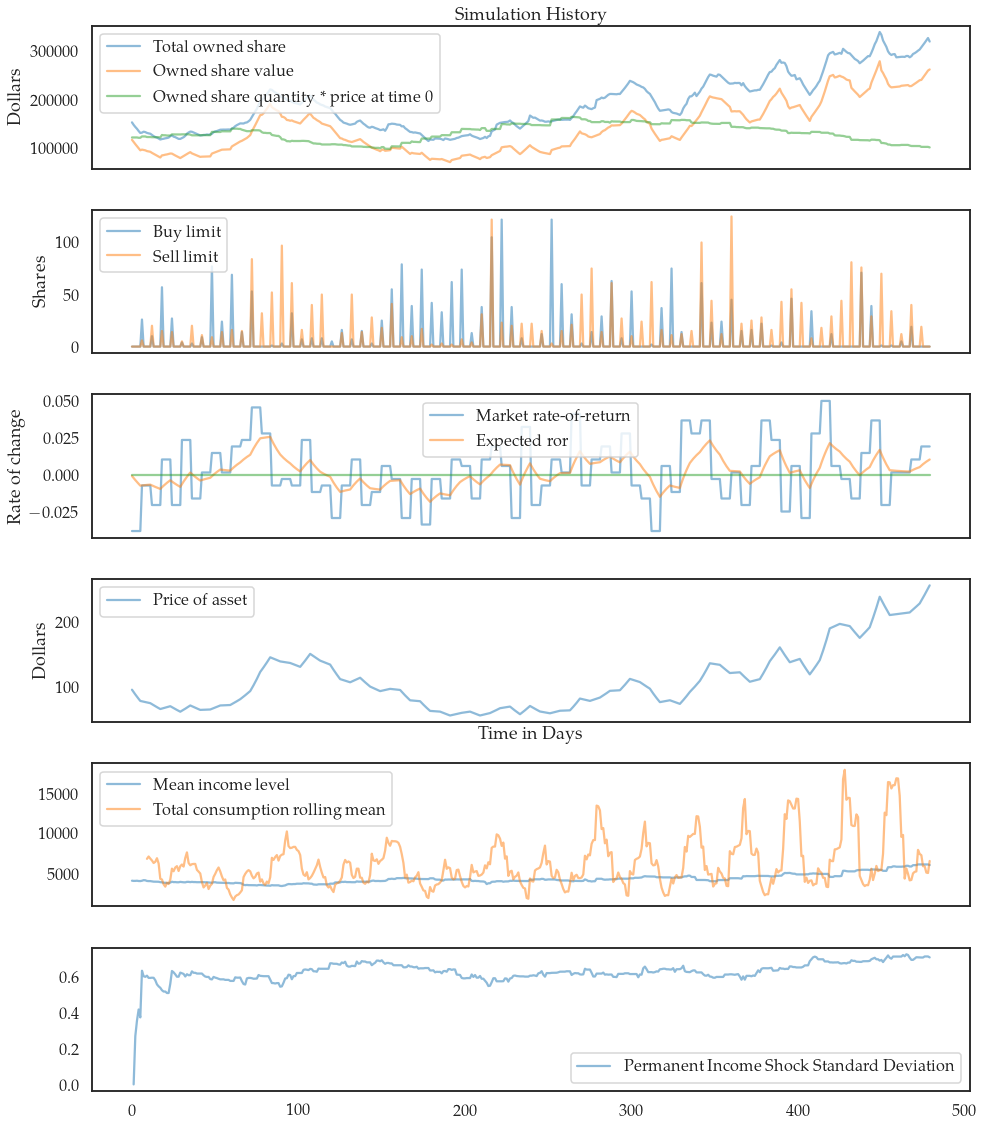

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(6,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(data['sell'], alpha=0.5, label='Sell limit')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[4].plot(data['mean_income'], alpha=0.5, label='Mean income level')
ax[4].plot(data['total_consumption'].rolling(10).mean(), alpha=0.5, label='Total consumption rolling mean')
ax[4].legend()

ax[5].plot(data['permshock_std'], alpha=0.5, label='Permanent Income Shock Standard Deviation')
ax[5].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [16]:
dir(sim.pop.agents[0].IncShkDstn[0])

['RNG',
 'X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dim',
 'draw',
 'draw_events',
 'pmf',
 'reset',
 'seed']

In [17]:
[a.IncShkDstn[0].seed for a in sim.pop.agents]

[43707360,
 72770721,
 89652543,
 73929629,
 66683883,
 54008923,
 25395759,
 41108794,
 76914048,
 42048670,
 76826802,
 60366138,
 84590440,
 14181025,
 67115749,
 59303792,
 57890986,
 23185439,
 65489555,
 41110517,
 94556603,
 44785855,
 31689983,
 35605205,
 35613569,
 59656514,
 25959014,
 89800097,
 44665893,
 13631831,
 845911,
 1226026,
 43495248,
 52263665,
 93157033,
 91015712,
 52061002,
 8408313,
 56637650,
 58368828,
 73758779,
 940016,
 24350683,
 89287770,
 7117775,
 36010028,
 54622421,
 52582832,
 31523002,
 94990976,
 3259349,
 67257040,
 45658031,
 64970511,
 33394388,
 37958000,
 20472625,
 79382804,
 77718558,
 51659396,
 68326748,
 42529059,
 36807607,
 51470461,
 53768462,
 97334488,
 49092771,
 28195257,
 5626523,
 7010715,
 31557211,
 12731583,
 80456841,
 30626390,
 70500030,
 59961708,
 48726033,
 40989123,
 24092927,
 37133229]

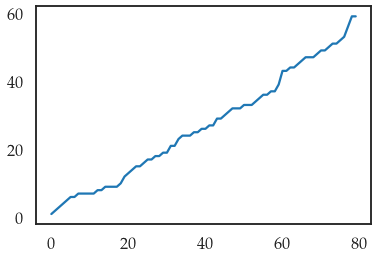

In [18]:
plt.plot(sorted([a.macro_day for a in sim.agents]))

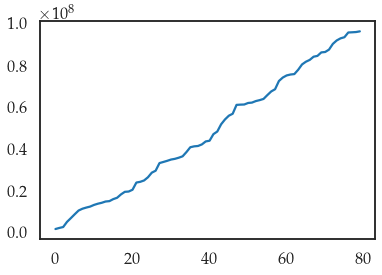

In [19]:
plt.plot(sorted([a.seed for a in sim.pop.agents]))

In [20]:
len(sim.history['total_consumption_level'])

480

In [21]:
720000 / 480

1500.0

In [22]:
sim.pop.agents

[<HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7f41289c2a30.
 Parameters:
 cycles: 1
 CRRA: 4.0
 Rfree: 1.0
 DiscFac: 0.9465000000000001
 LivPrb: [0.9949620563926881]
 PermGroFac: [1.0024906793143211]
 BoroCnstArt: 0.0
 MaxKinks: 400
 AgentCount: 4
 aNrmInitMean: 0.0
 aNrmInitStd: 0.0
 pLvlInitMean: 1.0
 pLvlInitStd: 0.0
 PermGroFacAgg: 1.0
 T_age: None
 T_cycle: 1
 PerfMITShk: False
 aXtraMin: 0.001
 aXtraMax: 100
 aXtraNestFac: 1
 aXtraCount: 200
 aXtraExtra: [None]
 PermShkStd: [0.6191893521335142]
 PermShkCount: 7
 TranShkStd: [0.16588349452107798]
 TranShkCount: 7
 UnempPrb: 0.05
 UnempPrbRet: 0.005
 IncUnemp: 0.3
 IncUnempRet: 0.0
 tax_rate: 0.0
 T_retire: 0
 vFuncBool: False
 CubicBool: False
 neutral_measure: False
 RiskyAvg: 1.405004126462125
 RiskyStd: 0.1041331610765907
 RiskyCount: 5
 AdjustPrb: 1.0
 ShareCount: 25
 DiscreteShareBool: False>,
 <HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7f4128b44b50.
 Parameter

In [23]:
sim.pop.agents[0].AgentCount

1

In [24]:
sns.lineplot(x=[i for i in range(len(os))], y=os)

NameError: name 'sns' is not defined

In [ ]:
sns.lineplot(x=[i for i in range(len(ta))], y=os)

In [ ]:
sns.lineplot(x=os, y=ta)

In [ ]:
# what are other good plots to include? I don't have the econ background necessary to figure this out yet

In [ ]:
sim.history